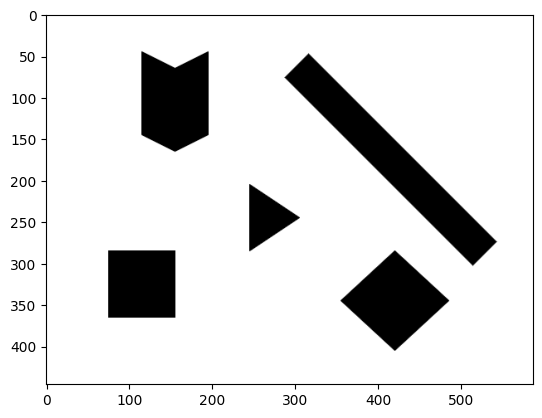

In [1]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./generated_images/o3.png"))

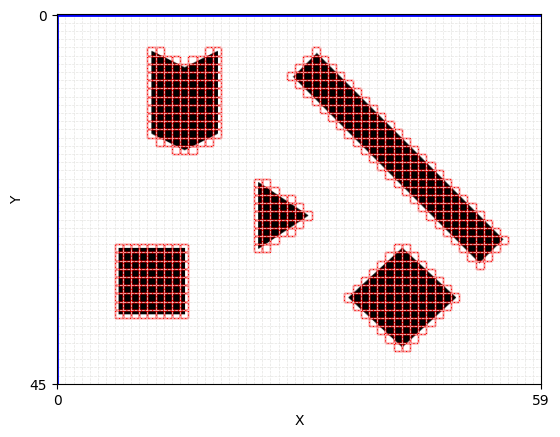

In [2]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path='./generated_images/o3.png', grid_size=10)
map.draw_coordinate_system()

In [3]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 243
Elapsed Time: 0.008910179138183594 seconds
path length = 64


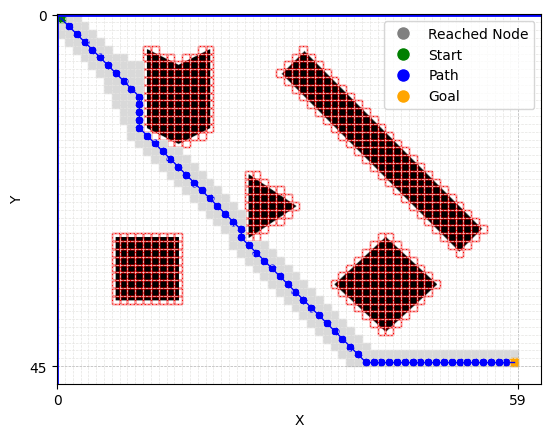

In [4]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.006837129592895508 seconds
Reached: 233
path length = 64


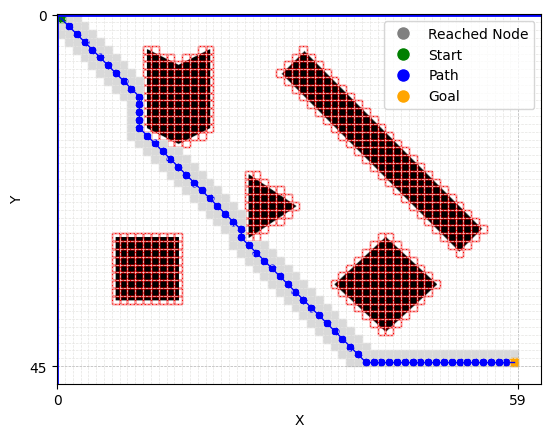

In [5]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")

print(f"Reached: {len(explorer.reached.keys())}")

path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [6]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

In [7]:
simplified_path

[(0, 0),
 array([10, 14]),
 array([10, 14]),
 array([11, 15]),
 array([23, 28]),
 array([23, 28]),
 array([45, 44]),
 array([57, 44]),
 array([58, 44])]

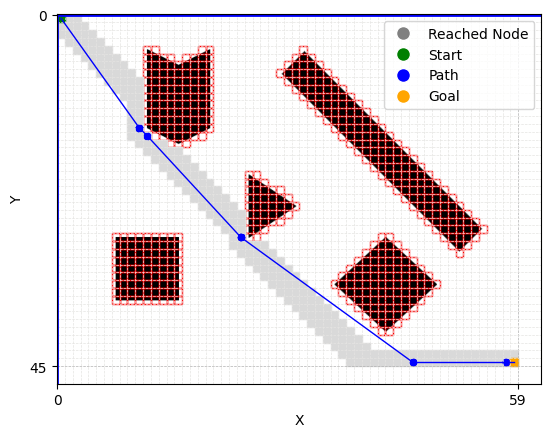

In [8]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

In [9]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
max_generation = 10

mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=max_generation, initial_population_size=10, 
                p_crossover=0.8, p_mutation=0.05, verbose=True)

# map.draw_path_found(path, initial, goal, [])

Finish Ant colony optimization, size of initial population:  120
------------Generation 1 -----------------
Population size:  120
Before selection, population size:  120
After selection, population size:  108
Before crossover, two first parents: 
[0, 60, 61, 62, 63, 122, 123, 182, 183, 125, 65, 64, 4, 3, 2, 1, 59, 119, 179, 239, 299, 359, 301, 242, 302, 303, 362, 420, 361, 421, 363, 304, 244, 243, 184, 185, 245, 186, 126, 67, 127, 187, 128, 68, 9, 10, 70, 69, 11, 71, 13, 73, 74, 134, 193, 252, 194, 253, 195, 136, 196, 137, 138, 198, 257, 258, 318, 259, 200, 201, 261, 260, 320, 262, 263, 322, 264, 323, 382, 381, 440, 499, 558, 500, 559, 618, 676, 677, 678, 736, 735, 675, 674, 673, 733, 734, 793, 852, 794, 854, 913, 855, 796, 856, 915, 973, 1033, 1093, 1034, 1035, 1094, 1152, 1151, 1210, 1211, 1153, 1213, 1273, 1214, 1274, 1332, 1390, 1331, 1389, 1388, 1329, 1387, 1447, 1448, 1449, 1391, 1451, 1452, 1453, 1512, 1571, 1631, 1630, 1572, 1632, 1574, 1633, 1634, 1575, 1635, 1577, 1519, 1459,

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)


After deletion: [0, 895, 955, 1016, 1616, 1675, 1735, 2512, 2654]
Mean fit_value:  -4679.162105485951
Mean path_value:  80.7581052742975
Mean smooth_value:  30.64
Best path:  [0, 2425, 2654]
------------Generation 9 -----------------
Population size:  50
Before selection, population size:  50
After selection, population size:  45
Before crossover, two first parents: 
[0, 1071, 1152, 1632, 1639, 1699, 1759, 1996, 2654]
[0, 198, 735, 1269, 1388, 2335, 2458, 2654]
After crossover, two first parents: 
[0, 1071, 1152, 1632, 1639, 1699, 1759, 1996, 2654]
[0, 198, 735, 1269, 1388, 2335, 2458, 2654]
Before mutation: [0, 1071, 1152, 1632, 1639, 1699, 1759, 1996, 2654]
After mutation: [0, 895, 1014, 1616, 1675, 1735, 2453, 2654]
Before insertion: [0, 895, 1014, 1616, 1675, 1735, 2453, 2654]
After insertion: [0, 477, 954, 1014, 1075, 1197, 1320, 1675, 1735, 2153, 2571, 2654]
Before deletion: [0, 477, 954, 1014, 1075, 1197, 1320, 1675, 1735, 2153, 2571, 2654]
After deletion: [0, 197, 499, 736, 121

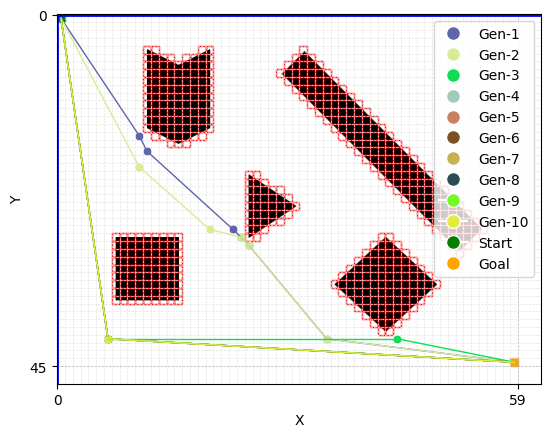

In [10]:
import numpy as np

plot_data = []
for index, path in enumerate(best_path):
    plot_data.append([convert_path_to_xy(path, cols), (np.random.rand(), np.random.rand(), np.random.rand()), f"Gen-{index+1}"])
map.draw_multiple_path_found(plot_data, initial, goal, [])


In [11]:
def scale_to_01(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

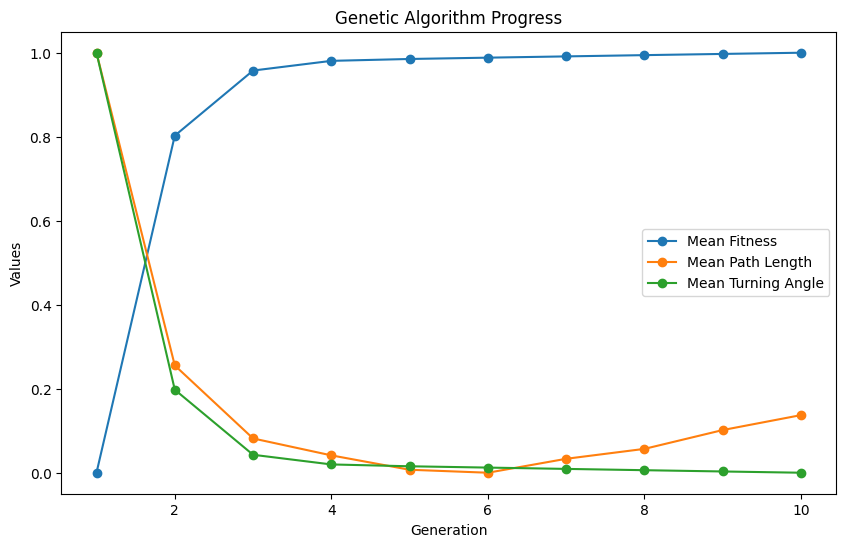

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
generations = np.arange(1, max_generation + 1)  # Assuming 10 generations for the example

# Plotting all three values in one graph
plt.figure(figsize=(10, 6))

plt.plot(generations, scale_to_01(mean_fit_value), label='Mean Fitness', marker='o')
plt.plot(generations, scale_to_01(mean_path_value), label='Mean Path Length', marker='o')
plt.plot(generations, scale_to_01(mean_smooth_value), label='Mean Turning Angle', marker='o')


plt.title('Genetic Algorithm Progress')
plt.xlabel('Generation')
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()


1st Generation and Last Generation

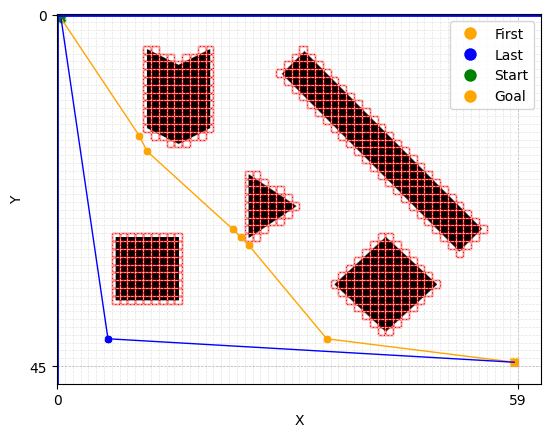

In [13]:
first = best_path[0]
last =  best_path[-1]
map.draw_multiple_path_found([
    [convert_path_to_xy(first, cols), 'orange', f"First"],
    [convert_path_to_xy(last, cols), 'blue', f"Last"],
], initial, goal, [])


In [14]:
from genetic.cal_smooth_value import cal_smooth_value
from genetic.cal_path_value import cal_path_value
new_population = [first, last]
path_value = cal_path_value(new_population, cols)
print('path_value: ', path_value)
smooth_value = cal_smooth_value(new_population, cols, verbose=True)
print('smooth_value: ', smooth_value)
fit_value = - path_value - smooth_value
print('fit_value: ', fit_value)

path_value:  [77.76559282 93.52316528]
Path 1
Angle 0 1 2:  172.87498365109815
Angle 1 2 3:  158.83874018317172
Angle 2 3 4:  177.27368900609366
Angle 3 4 5:  179.99999879258172
Angle 4 5 6:  174.8055710922652
Angle 5 6 7:  136.930587441167
Path 2
Angle 0 1 2:  101.62751600486183
smooth_value:  [24.  4.]
fit_value:  [-101.76559282  -97.52316528]


Crossover from 2nd generation

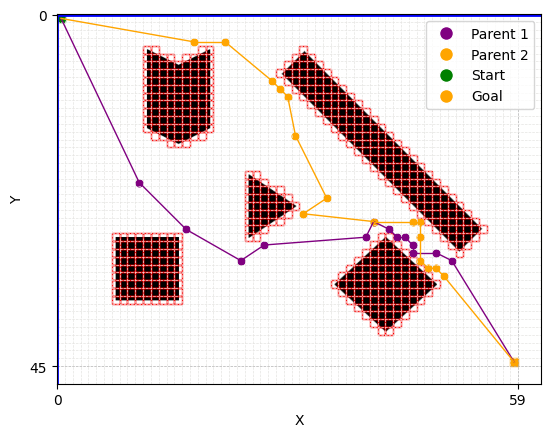

In [15]:
p1 = [0, 1249, 1609, 1852, 1737, 1691, 1574, 1635, 1695, 1696, 1756, 1815, 1818, 1879, 2654]
p2 = [0, 194, 198, 499, 559, 619, 915, 1391, 1506, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
map.draw_multiple_path_found([
    [convert_path_to_xy(p1, cols), 'purple', 'Parent 1'], 
    [convert_path_to_xy(p2, cols), 'orange',  'Parent 2']],
    initial, goal, []
)

[0, 1249, 1609, 1852, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 194, 198, 499, 559, 619, 915, 1391, 1506, 1574, 1635, 1695, 1696, 1756, 1815, 1818, 1879, 2654]


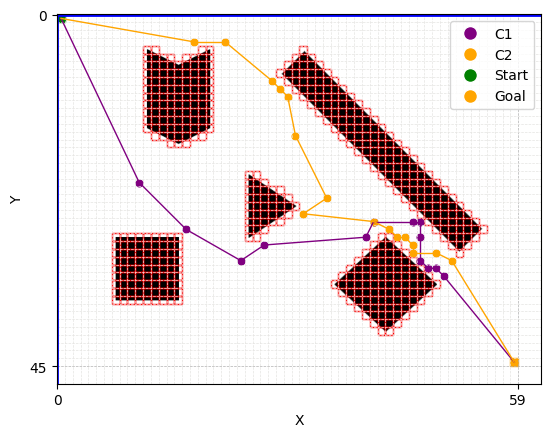

In [16]:
from genetic.crossover import crossover
children = crossover([p1, p2], p_crossover=1)

print(children[0])
print(children[1])
map.draw_multiple_path_found([
    [convert_path_to_xy(children[0], cols), 'purple', 'C1'],
    [convert_path_to_xy(children[1], cols), 'orange', 'C2']
], initial, goal, [])

[0, 1249, 1609, 1852, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 1249, 1609, 1910, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]


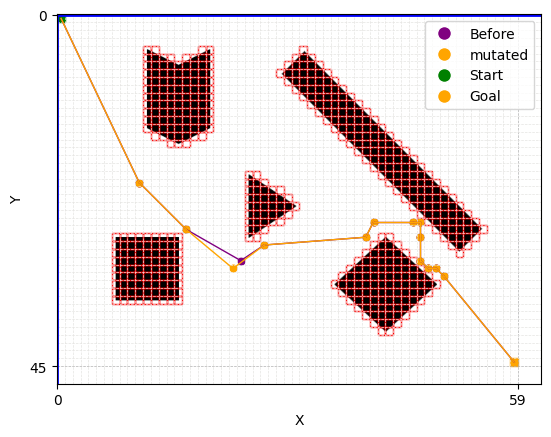

In [19]:
from genetic.mutation import mutation
mutated = mutation([children[0]], p_mutation=1, G=G)[0]
print(children[0])
print(mutated)
map.draw_multiple_path_found([
    [convert_path_to_xy(children[0], cols), 'purple', 'Before'],
    [convert_path_to_xy(mutated, cols), 'orange', 'mutated'],
    ], initial, goal, [])

[0, 1249, 1609, 1910, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 595, 1249, 1429, 1609, 1730, 1910, 1794, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2295, 2654]


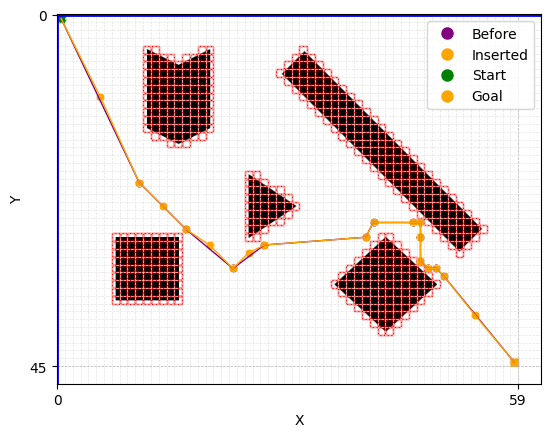

In [20]:
from genetic.insertion import insertion

inserted = insertion([mutated], G=G)[0]
print(mutated)
print(inserted)
map.draw_multiple_path_found([
    [convert_path_to_xy(mutated, cols), 'purple', 'Before'],
    [convert_path_to_xy(inserted, cols), 'orange', 'Inserted'],
], initial, goal, [])

[0, 595, 1249, 1429, 1609, 1730, 1910, 1794, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2295, 2654]
[0, 1249, 1609, 1910, 1737, 1691, 1574, 1580, 1875, 1935, 1936, 1996, 2654]


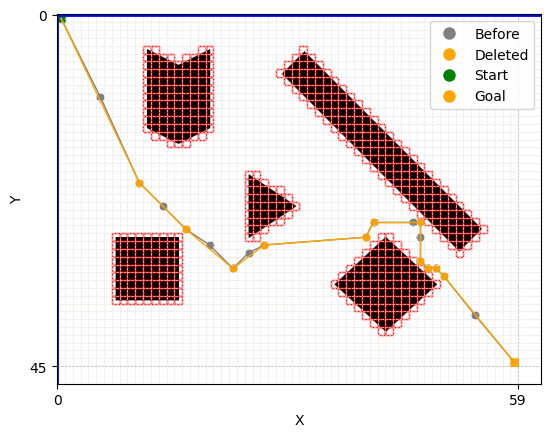

In [23]:
from genetic.deletion import deletion

deleted = deletion([inserted], map)[0]
print(inserted)
print(deleted)
map.draw_multiple_path_found([
    [convert_path_to_xy(inserted, cols), 'gray', 'Before'],
    [convert_path_to_xy(deleted, cols), 'orange', 'Deleted'],
], initial, goal, [])